In [7]:
# In TensorFlow once you import the library, commands
# such as tf.constant create new nodes in a global
# "default graph". Then for example the tf.matmul
# command actually creates a new node whose value is
# tied by an equation to the values of c,d. When evaluated
# in a Session via sess.run, the values of these derived
# nodes can be extracted.

from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import tensorflow as tf
import numpy as np

from tensorflow.python.ops import array_ops

# Build a dataflow graph.
c = tf.constant([[1.0, 2.0], [3.0, 4.0]])
d = tf.constant([[1.0, 1.0], [0.0, 1.0]])
e = tf.matmul(c, d)
x = tf.constant([[1.0, 2.0, 3.0]])
t = tf.matmul(tf.transpose(x),x)
t = tf.reshape(t,[-1])

# Construct a `Session` to execute the graph.
sess = tf.Session()

# Execute the graph and store the value that `e` represents in `result`.
result = sess.run(t)
print(result)

[ 1.  2.  3.  2.  4.  6.  3.  6.  9.]


In [2]:
# Here is an example of the main loop in our linear logic RNN
# the batch size is 2, input size is 1, state size is 2

inputs = tf.constant([[0.0],[1.0]])
state = tf.constant([[1.0, 2.0],[3.0, 4.0]])
h = array_ops.concat(1, [inputs,state])

# Now the row index in inputs and shape currently represents the batch
# we convert this to a list index using unpack, after first inserting
# a new index to be the row
h2 = tf.expand_dims(h,1)
h3 = tf.unpack(h2) # a list, containing 1x3 row vectors
li = []
for row in h3:
    li.append(tf.matmul(tf.transpose(row),row))
h4 = tf.pack(li)
h5 = tf.reshape(h4,[int(h4.get_shape()[0]),-1]) # convert back to a 2D tensor

print("inputs shape: " + str(inputs.get_shape()))
print("inputs is: ")
print(sess.run(inputs))
print("state shape: " + str(state.get_shape()))
print("state is: ")
print(sess.run(state))
print("h shape: " + str(h.get_shape()))
print("h is: ")
print(sess.run(h))
print("h2 shape: " + str(h2.get_shape()))
print("first element of h3 shape: " + str(h3[0].get_shape()))
print("first element of h3 is: ")
print(sess.run(h3[0]))
print("h4 shape: " + str(h4.get_shape()))
print(sess.run(h4))
print("h5 shape: " + str(h5.get_shape()))
print(sess.run(h5))

TypeError: Expected int32, got list containing Tensors of type '_Message' instead.

In [ ]:
# In practice however the situation is more complicated,
# because TF does not infer the batch size and hence cannot
# use tf.pack and tf.unpack. Instead we use TensorArray, as follows

batch_size = 2
TensorArr = tf.TensorArray(tf.float32, 1, dynamic_size=True, infer_shape=False)
h3 = TensorArr.unpack(h2)

print("h2 shape: " + str(h2.get_shape()))
print("h3 size: " + str(h3.size()))
print("h3 first element: ")
print(sess.run(h3.read(0)))

h3p = tf.TensorArray(tf.float32, 1, dynamic_size=True,infer_shape=False)
for row in range(batch_size):
    row_tensor = h3.read(row)
    
    # Note it's important to put h3p = h3p.write each time
    h3p = h3p.write(row, tf.matmul(tf.transpose(row_tensor),row_tensor))

h4 = h3p.pack()
h5 = tf.reshape(h4,[2,-1]) # convert back to a 2D tensor

print("h5 shape: " + str(h5.get_shape()))
print(sess.run(h5))

In [ ]:
# Alternatively we can use map_fn. Much better! Uses TensorArray under the hood
f = lambda x: tf.reshape(tf.matmul(tf.transpose(x),x),[-1])
h5 = tf.map_fn(f, h2)
print("h5 shape: " + str(h5.get_shape()))
print(sess.run(h5))

In [ ]:
# Trying to understand Tensor / np.array operations
c = tf.constant([[1.0, 2.0], [3.0, 4.0]])
b = tf.constant([-1.0, 2.0])
print(sess.run(c+b))

In [ ]:
def f_reverse(seq):
    t = [0]*len(seq)
    for j in range(len(seq)):
        t[len(seq)-j-1] = seq[j]
    return t

seq = [0,1,0,1,1]

f_reverse(seq)

In [ ]:
int(10.3)

In [ ]:
3**2

In [ ]:
c = tf.expand_dims(tf.constant([[1.0, 2.0], [3.0, 4.0]]),1)
print(sess.run(c))
print(c.get_shape())
d = tf.constant([[[1.0, 0.0], [0.0, 1.0]], [[2.0, 0.0], [0.0, 2.0]]])
e = tf.batch_matmul(c,d)
f = tf.squeeze(e)
print(sess.run(e))
print("")
print(sess.run(tf.reshape(e,[2,2])))

In [ ]:
operator_size = 2
state_size = 4

iota_matrix = []
for i in range(state_size):
    a = [0.0]*operator_size
    if i < operator_size:
        a[i] = 1.0
    iota_matrix.append(a)
    
rho_matrix = []
for i in range(operator_size):
    a = [0.0]*state_size
    if i < state_size:
        a[i] = 1.0
    rho_matrix.append(a)
    
print(iota_matrix)
print(rho_matrix)

In [ ]:
c = tf.constant([[1.0, 2.0, 3.0], [4.0, 5.0, 6.0]])
#d = tf.expand_dims(c,1)
make_diag = lambda A: tf.diag(A)
v = tf.map_fn(make_diag,c)
print(sess.run(v))
print(v.get_shape())
print(c.get_shape())
print(tf.diag([1.0,2.0,3.0]))

In [ ]:
# Set up the projections to and injections from H to H1 (see Remark 2.6)

rho_matrix = []
for i in range(state_size):
    a = [0.0]*operator_size
    if i < operator_size:
        a[i] = 1.0
    rho_matrix.append(a)
    
iota_matrix = []
for i in range(operator_size):
    a = [0.0]*state_size
    if i < state_size:
        a[i] = 1.0
    iota_matrix.append(a)
    
# If you're confused about the dimensions, it's because we are going
# to multiply on the RIGHT.

In [ ]:
def skiprepeat(seq):
    t = []
    for j in range(len(seq)):
        if j % 2 == 0:
            t.append(seq[j])
        else:
            t.append(seq[j-1])
    return t

print(skiprepeat([1,0,0,0]))

In [ ]:
def rotation_tensor(size):
    """
    Returns rotation matrices as a [3,3,3] tensor, which is [R^0, R^1, ..., R^{size-1}] 
    where R is the rotation matrix sending the first basis element to the second and 
    the final basis element to the first.
    """
    one_hots = []
    for i in range(size):
        a = [0.0]*size
        a[i] = 1.0
        one_hots.append(tf.constant(a))

    R_list = []
    for i in range(size):
        R = []
        for j in range(size):
            index = (j + i) % size
            R.append(one_hots[index])
        R_list.append(tf.stack(R))

    R_tensor = tf.stack(R_list)

    return R_tensor

In [ ]:
rotations = rotation_tensor(3)
print(rotations)

In [ ]:
print(sess.run(rotations))

In [ ]:
one_hots = []
size = 3
for i in range(size):
    a = [0.0]*size
    a[i] = 1.0
    one_hots.append(tf.constant(a))

In [ ]:
print(one_hots)

In [ ]:
a = tf.constant(np.arange(1, 13, dtype=np.int32),shape=[2, 2, 3]) 

In [ ]:
b = tf.constant(np.arange(13, 25, dtype=np.int32),shape=[2, 3, 2])

In [ ]:
c = tf.matmul(a, b)

In [ ]:
print(sess.run(c))

In [ ]:
print(c.get_shape()[0])

In [ ]:
from numpy import array
import numpy as np
a = array([[[2.0,1.0],[3.0,4.0]],
           [[5.0,6.0],[7.0,8.0]]])
b = array([[1.0,2.0],
          [3.0,4.0]])
np.multiply(a,b)

In [ ]:
import learnfuncs

In [ ]:
def f_repetitionpattern(seq,pattern):
    t = []
    i = 0
    j = 0
    while(len(t) < len(seq)):
        t.append(seq[j % len(seq)])
        j = j + pattern[i % len(pattern)]
        i = i + 1
    return t 

In [ ]:
pattern = [0,0,1]
func_to_learn = lambda s: f_repetitionpattern(s,pattern)

func_to_learn([1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1])

In [ ]:
def rotation_tensor(size,powers):
    """
    Returns rotation matrices as a [3,3,3] tensor, which is [R^{p_1}, R^{p_2}, ...]
    where R is the rotation matrix sending the first basis element to the second and 
    the final basis element to the first, and powers = [p_1,p_2,...]. The size of the
    matrices is given by "siez". Note the convention about matrices at the
    top of this file.
    """
    one_hots = []
    for i in range(size):
        a = [0.0]*size
        a[i] = 1.0
        one_hots.append(tf.constant(a))

    R_list = []
    for i in powers:
        R = []
        for j in range(size):
            index = (j + i) % size
            R.append(one_hots[index])
        R_list.append(tf.stack(R))

    R_tensor = tf.stack(R_list)

    return R_tensor

In [ ]:
rotation_tensor(3,[0,1,2])

In [ ]:
print(sess.run(rotation_tensor(4,[-1,0,1,2])))

In [ ]:
def shuffled_seqs(N,num_classes):
    """
    Creates a shuffled list of all sequences of length N from the set {0,1,...,num_classes-1}.
    Each sequence comes in the form 
    """
    seq_unshuffled = []
    a = [0]*N
    inc_index = N - 1
    
    while(1):
        seq_unshuffled.append(a)
        a = list(a) # make a copy
        j = N - 1
        
        while( j >= 0 and a[j] == num_classes - 1 ):
            a[j] = 0
            j = j - 1
            
        if( j == -1 ):
            break
            
        a[j] = a[j] + 1
    
    seq_shuffled = shuffle(seq_unshuffled)
    return seq_unshuffled

In [ ]:
shuffled_seqs(3,3)

In [ ]:
a = [0]*2
print(a)

In [ ]:
a = tf.constant(a)

In [ ]:
np.true_divide(1,3)

In [ ]:
import random

In [ ]:
random.sample([0,1,2,3,4],3)

In [ ]:
a = [random.randint(0,3) for i in range(6)]
print(a)

In [ ]:
2**20*0.01

In [ ]:
3**20

In [ ]:
0.00001*3**20

In [ ]:
a = np.zeros([2,3])
print(a + [1, 0, 0])

In [15]:
ra = [0.0] * 4
ra[0] = 1.0
ra = np.zeros([2,4,4]) + ra
print(ra)

[[[ 1.  0.  0.  0.]
  [ 1.  0.  0.  0.]
  [ 1.  0.  0.  0.]
  [ 1.  0.  0.  0.]]

 [[ 1.  0.  0.  0.]
  [ 1.  0.  0.  0.]
  [ 1.  0.  0.  0.]
  [ 1.  0.  0.  0.]]]


In [ ]:
np.zeros([2,10]) + ra

In [ ]:
a = tf.constant([[1.0,1.0],[1.0,1.0]])
b = tf.constant([2.0])
print(b.get_shape())
print(sess.run(1.0 + a))

In [ ]:
a = tf.constant([1.0, 2.0, 3.0])
W = tf.constant([[1.],[2.]])
B = tf.constant(2.0)
h = tf.constant([[1.0, 2.0],[3.0,4.0]])
gamma = 1.0 + tf.nn.relu(tf.matmul(h,W) + B)
print(sess.run(gamma))

In [ ]:
r = tf.constant([[1.0, 2.0], [3.0, 4.0]])
sharpening_tensor_r = tf.zeros_like(r) + gamma
print(sess.run(sharpening_tensor_r))

In [ ]:
sharp_r = tf.pow(r, sharpening_tensor_r)
print(sess.run(sharp_r))

In [ ]:
denom_r = tf.reduce_sum(sharp_r,axis=1,keep_dims=True)
print(sess.run(denom_r))
r_new = sharp_r / denom_r
print(sess.run(r_new))

In [ ]:
print(r_new.get_shape())

In [ ]:
1/257

In [ ]:
256/257

In [ ]:
4.782969e06/2.73218432e08

In [ ]:
2**20

In [ ]:
8**5

In [ ]:
8**10

In [ ]:
8**6

In [ ]:
8**8

In [ ]:
8**7

In [ ]:
0.01*2**20

In [ ]:
[0] + [2,3,4] + [1]

In [ ]:
8**10

In [ ]:
2**8

In [ ]:
256**5

In [ ]:
import random
random.seed()
N = 10
N_out = 10
term_symbol = 9
init_symbol = 8
num_classes = 10
seq_length = random.randint(3,N)
print("seq_length = " + str(seq_length))
a = [random.randint(0,num_classes-3) for k in range(seq_length-2)]
print(a)
fa = [term_symbol for k in range(seq_length-1)] + a + [term_symbol for k in range(N+N_out-2*seq_length+3)]
a = [init_symbol] + a + [term_symbol] + [term_symbol for k in range(N+N_out-seq_length)]
print(a)
print(fa)

In [ ]:
a = [1,2,3]
print(a[1:])

In [ ]:
range(3,5)

In [ ]:
no_of_copies = 2
pattern = [0]*(no_of_copies - 1) + [1]
print(pattern)

In [ ]:
print([1.0] + [0.0]*3)

In [ ]:
print(np.zeros([2,2]) + [1.0, 0.0])

In [ ]:
a = [[1,2],[2,3]]
print(a[1][1])

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab

In [ ]:
ax = plt.subplot(1,1,1)
ax.imshow([[[0.0, 0.0, 1.0], [0.0, 0.0, 0.0], [1.0, 0.0, 0.0]]], cmap='bone', interpolation='nearest', aspect='auto')
plt.show()

In [ ]:
a = [0,1,2,3,4]
a[-2:]

In [ ]:
print(str(a))

In [ ]:
def p():
    print("x")
    
h = p
h()

In [6]:
def f_multpattern(seq,pattern1,pattern2,div_symbol):
    patterns = [pattern1,pattern2]
    t = []
    i = 0
    j = 0
    k = 0
    while(j < len(seq)):        
        t.append(seq[j])
            
        j = j + patterns[k][i % len(patterns[k])]
        i = i + 1
        
        while(j < len(seq) and seq[j] == div_symbol ):
            k = (k + 1) % 2
            j = j + 1
    return t

In [9]:
a = [1, 3, 6, 3, 7,7, 7, 4]
f_multpattern(a,[1],[0,1],7)

[1, 3, 6, 3, 4, 4]

In [ ]:
1 % 2

In [11]:
use_logits = [False, True]
if( use_logits == True ):
    print("a")

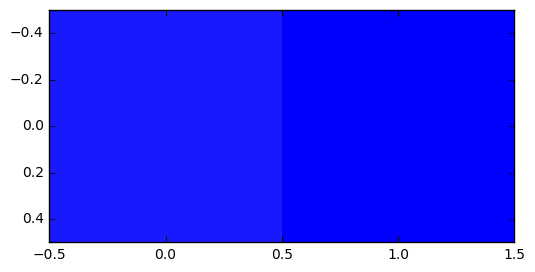

In [10]:
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab

plt.figure(1)
ax = plt.subplot(1,1,1)
arr = [[[0.1, 0.1, 1.0], [0.0, 0.0, 1.0]]]
ax.imshow(arr, cmap='bone', interpolation='nearest', aspect='equal')
plt.show()

In [1]:
int(18.5183889866)

18

In [2]:
int(5/2)

2

In [14]:
def split_on(delims, seq, remove_empty=True):
    '''Split seq into lists using delims as a delimiting elements.

    For example, split_on(delims=2, list=xrange(0,5)) yields [ [0,1], [3,4] ].

    delims can be either a single delimiting element or a list or
    tuple of multiple delimiting elements. If you wish to use a list
    or tuple as a delimiter, you must enclose it in another list or
    tuple.

    If remove_empty is False, then consecutive delimiter elements or delimiter elements at
    the beginning or end of the longlist'''
    if type(delims) not in (type(list()), type(tuple())):
        delims = ( delims, )
    def reduce_fun(lists, elem):
        if elem in delims:
            if remove_empty and lists[-1] == []:
                # Avoid adding multiple empty lists
                pass
            else:
                lists.append([])
        else:
            lists[-1].append(elem)
        return lists
    result_list = reduce(reduce_fun, seq, [ [], ])
    # Maybe remove trailing empty list
    if remove_empty and result_list[-1] == []:
        result_list.pop()
    return result_list

In [16]:
print(split_on([7],[7,1,2,3,7,7,8,1,2]))

[[1, 2, 3], [8, 1, 2]]


In [43]:
def f_repetitionpattern(seq, pattern):
    t = []
    i = 0
    j = 0
    while(j < len(seq)):
        t.append(seq[j])
        j = j + pattern[i % len(pattern)]
        i = i + 1
    return t

def f_multpattern(seq,patterns,div_symbol):    
    # We parse the sequence and create a list of lists,
    # of the form [n, L] where n = 0,1 is the pattern
    # to use and L is a list of integers to which it should
    # be applied

    parse_list = []
    curr_subseq = []
    curr_pattern = 0
    j = 0
    
    while(j < len(seq)):
        if(seq[j] != div_symbol):
            curr_subseq.append(seq[j])

        if(seq[j] == div_symbol or j == len(seq)-1):
            if( len(curr_subseq) != 0 ):
                parse_list.append([curr_pattern,curr_subseq])

        if(seq[j] == div_symbol):
            curr_pattern = (curr_pattern + 1) % len(patterns)
            curr_subseq = []
        
        j = j + 1

    t = []    
    for q in parse_list:
        t = t + f_repetitionpattern(q[1],patterns[q[0]])

    return t

pattern1 = [1] # so (a,b,c,d,e,f,...) goes to (a,b,c,d,e,f,...)
pattern2 = [0,1] # so (a,b,c,d,e,f,...) goes to (a,a,c,c,...)
func_to_learn = lambda s: f_multpattern(s,[pattern1,pattern2,[1,2]],7)
func_to_learn([7,1,2,7,7,1,2,3,4,5,7,1,2,3,4,7,1,2])

[1, 1, 2, 2, 1, 2, 3, 4, 5, 1, 1, 2, 2, 3, 3, 4, 4, 1, 2]

In [42]:
def one_hot_vectors(num_classes):
    one_hots = []
    for i in range(num_classes):
        a = [0.0]*num_classes
        a[i] = 1.0
        one_hots.append(np.array(a))
    return one_hots

one_hots = one_hot_vectors(4)
#print(one_hots)
term_symbol = 3

targets = np.array([one_hots[0], one_hots[1], one_hots[2]])
t = tf.constant(targets,dtype=tf.float32,shape=[3,4])
q = tf.not_equal(tf.argmax(t,1),2)
print(sess.run(t))
print(sess.run(q))
#print(sess.run(tf.argmax(t,1)))
#print(tf.argmax(t,1).get_shape())
#mask = tf.not_equal(t,2)
#print(sess.run(mask))
#print(tf.argmax(one_hots[2],0))
r = tf.reduce_max(tf.cast(q, tf.float32))
print(sess.run(r))

[[ 1.  0.  0.  0.]
 [ 0.  1.  0.  0.]
 [ 0.  0.  1.  0.]]
[ True  True False]
1.0


In [48]:
import random
def f_repetitionpattern(seq, pattern):
    t = []
    i = 0
    j = 0
    while(j < len(seq)):
        t.append(seq[j])
        j = j + pattern[i % len(pattern)]
        i = i + 1
    return t

f_repetitionpattern([1,2,3,4,5,6],[0,1,2])

[1, 1, 2, 4, 4, 5]

In [55]:
random_pattern = [random.randint(0,2) for k in range(3)]
print(random_pattern)
a = f_repetitionpattern([1,2,3,4,5,6],random_pattern)
print(a)

[1, 0, 2]
[1, 2, 2, 4, 5, 5]


In [56]:
range(0)

[]

In [57]:
a = [1,2,3,4,5,6]
a[:4]

[1, 2, 3, 4]

In [76]:
def f_varpattern(seq, init_symbol):    
    # We parse seq into A.S.B where "." stands for concatentation,
    # A, B are sequences and S is the init_symbol. Then we run A
    # as a pattern on B using f_repetitionpattern
    
    A = []
    B = []
    
    Sfound = False
    for x in seq:
        if( x == init_symbol ):
            Sfound = True
        else:
            if( Sfound == False ):
                A.append(x)
            else:
                B.append(x)
    
    t = f_repetitionpattern(B,A)
    return t

print(f_varpattern([2,8,1,2,3,4,5],8))

varpatterns = [[1],[2],[0,1],[0,2],[1,2]]
init_symbol = 8

def generate_input_seq_varpattern(max_symbol,input_length):
    vp = varpatterns[random.randint(0,len(varpatterns)-1)]
    t = vp + [init_symbol] + [random.randint(0,max_symbol) for k in range(input_length-len(vp)-1)]
    return t

print(generate_input_seq_varpattern(7,10))

[1, 3, 5]
[0, 1, 8, 2, 4, 2, 3, 6, 7, 4]


In [88]:
vp_length = random.randint(1,8)
print(vp_length)
vp = [random.randint(0,2) for k in range(vp_length)]
print(vp)

5
[1, 1, 1, 0, 1]


In [90]:
np.array([1,2])-np.array([0,3])

array([ 1, -1])

In [91]:
int(False)

0

In [92]:
int(True)

1

In [93]:
q = [1,2,3,4]
p = [1,6,3,5]
print([int(a==b) for a,b in zip(q,p)])

[1, 0, 1, 0]


In [8]:
import random
random.randint(-2,2)

-2